In [ ]:
################################### Summary ####################################
# We implemented our content based algorithm by first clustering whole datasets into 24 clustering, and figure out
# the cosine similarities under each cluster.
# Each time when we needed to figure out recommendation lists for one movie
# 1. Find out the cluster number,
# 2. Within the cluster, calculate the similarities

In [ ]:
import numpy as np
import pandas as pd
import nltk
from rake_nltk import Rake
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
#conda install -c conda-forge rake_nltk

## Import files

In [ ]:
movie = pd.read_csv('IMDb-movies-csv.csv')
rating = pd.read_csv('IMDb-ratings-csv.csv')
movie_merge_rating = movie.merge(rating)

/Applications/anaconda3/envs/Python38env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [ ]:
movie[movie['year'] == 2020]
#movie[movie['title'].str.contains('')]

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
51533,tt0926132,Road to Red,Road to Red,2020,2020-01-03,"Action, Adventure, Horror",120,"USA, Portugal",English,Tito da Costa,...,"Sean Gray, Chris Blasman, Renee Dorian, Michae...",A surf-skate action-thriller about five best f...,4.2,472,$ 3000000,NaN,NaN,NaN,8.0,1.0
52039,tt0983946,Fantasy Island,Fantasy Island,2020,2020-02-13,"Action, Adventure, Fantasy",109,USA,English,Jeff Wadlow,...,"Michael Peña, Maggie Q, Lucy Hale, Austin Stow...",When the owner and operator of a luxurious isl...,4.9,26823,$ 7000000,$ 26441782,$ 47315959,22.0,635.0,154.0
52245,tt10003008,The Rental,The Rental,2020,2020-07-24,"Horror, Thriller",88,USA,English,Dave Franco,...,"Dan Stevens, Alison Brie, Sheila Vand, Jeremy ...",Two couples rent a vacation home for what shou...,5.7,9453,NaN,$ 1561048,$ 2113008,63.0,233.0,133.0
52271,tt10022990,Seeru,Seeru,2020,2020-02-07,"Action, Drama",123,India,Tamil,"Rathina Shiva, Sami Rajalingam",...,"Jiiva, Navdeep, Riya Suman, Varun, Sathish, R....",A guy from a small-town takes on a ruthless cr...,5.4,224,NaN,NaN,NaN,NaN,6.0,3.0
52272,tt10023024,Love Aaj Kal,Love Aaj Kal,2020,2020-02-14,"Drama, Romance",142,India,Hindi,Imtiaz Ali,...,"Kartik Aaryan, Sara Ali Khan, Randeep Hooda, A...",Two different individuals on a journey of love...,5.0,6292,NaN,NaN,$ 5120794,NaN,682.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63223,tt1929297,Last Moment of Clarity,Last Moment of Clarity,2020,2020-05-19,Thriller,90,USA,English,"Colin Krisel, James Krisel",...,"Zach Avery, Brian Cox, Udo Kier, Samara Weavin...",Three years after witnessing the murder of his...,5.1,1233,NaN,NaN,NaN,NaN,42.0,13.0
63491,tt1964995,Penance Lane,Penance Lane,2020,2020-04-21,Horror,84,USA,NaN,Péter Engert,...,"Tyler Mane, Scout Taylor-Compton, John Schneid...",A hardened criminal fresh out of the joint tak...,4.8,828,NaN,NaN,NaN,NaN,33.0,19.0
65130,tt2180583,Unbelievable!!!!!,Unbelievable!!!!!,2020,2020-08-07,"Comedy, Sci-Fi",105,USA,English,Steven L. Fawcette,...,"Snoop Dogg, Garrett Wang, Chase Masterson, Tim...",Martians have conquered Earth. Four astronauts...,4.1,507,$ 3750000,NaN,NaN,NaN,20.0,NaN
65331,tt2197936,Fatima,Fatima,2020,2020-08-28,Drama,113,"USA, Portugal",English,Marco Pontecorvo,...,"Joaquim de Almeida, Goran Visnjic, Stephanie G...","Based on historical events, three young shephe...",6.3,479,NaN,NaN,$ 128270,52.0,26.0,14.0


In [ ]:
movie.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Denmark, Germany",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


## Cleaning

In [ ]:
dfMovie = movie[['title','genre','country','language','director','actors','description']]
dfMovie.set_index('title', drop = False, inplace = True)
dfMovie = dfMovie.fillna('NAN')
#Transforming the full names of actors and directors in single words so they are considered as unique values.

# discarding the commas between the actors' full names and getting only the first three names
dfMovie['actors'] = dfMovie['actors'].map(lambda x: x.split(',')[:3])
# putting the genres in a list of words
dfMovie['genre'] = dfMovie['genre'].map(lambda x: x.lower().split(','))
dfMovie['director'] = dfMovie['director'].map(lambda x: x.split(' '))
dfMovie['language'] = dfMovie['language'].map(lambda x: x.lower().split(','))
dfMovie['country'] = dfMovie['country'].map(lambda x: x.lower().split(','))
dfMovie['title'] = dfMovie['title'].map(lambda x: x.lower().split(' '))


# merging together first and last name for each actor and director, so it's considered as one word 
# and there is no mix up between people sharing a first name
for index, row in dfMovie.iterrows():
    row['actors'] = [x.lower().replace(' ','') for x in row['actors']]
    row['director'] = ''.join(row['director']).lower()
    #row['language'] = ''.join(row['language']).lower()
    #row['country'] = ''.join(row['country']).lower()

In [ ]:
dfMovie.head()

,title,genre,country,language,director,actors,description
title,,,,,,,
Miss Jerry,"[miss, jerry]",[romance],[usa],[none],alexanderblack,"[blanchebayliss, williamcourtenay, chaunceydepew]",The adventures of a female reporter in the 1890s.
The Story of the Kelly Gang,"[the, story, of, the, kelly, gang]","[biography, crime, drama]",[australia],[none],charlestait,"[elizabethtait, johntait, normancampbell]",True story of notorious Australian outlaw Ned ...
Den sorte drøm,"[den, sorte, drøm]",[drama],"[denmark, germany]",[nan],urbangad,"[astanielsen, valdemarpsilander, gunnarhelseng...",Two men of high rank are both wooing the beaut...
Cleopatra,[cleopatra],"[drama, history]",[usa],[english],charlesl.gaskill,"[helengardner, pearlsindelar, missfielding]",The fabled queen of Egypt's affair with Roman ...
L'Inferno,[l'inferno],"[adventure, drama, fantasy]",[italy],[italian],"francescobertolini,adolfopadovan","[salvatorepapa, arturopirovano, giuseppedeligu...",Loosely adapted from Dante's Divine Comedy and...


In [ ]:
#Extracting keywords from plots
# initializing the new column
dfMovie['Key_words'] = ""

for index, row in dfMovie.iterrows():
    plot = row['description']
    
    # instantiating Rake, by default it uses english stopwords from NLTK
    # and discards all puntuation characters as well
    r = Rake()

    # extracting the words by passing the text
    r.extract_keywords_from_text(plot)

    # getting the dictionary whith key words as keys and their scores as values
    key_words_dict_scores = r.get_word_degrees()
    
    # assigning the key words to the new column for the corresponding movie
    row['Key_words'] = list(key_words_dict_scores.keys())

# dropping the Plot column
dfMovie.drop(columns = ['description'], inplace = True)

In [ ]:
dfMovie.shape

(85855, 7)

In [ ]:
dfMovie.head()

,title,genre,country,language,director,actors,Key_words
title,,,,,,,
Miss Jerry,"[miss, jerry]",[romance],[usa],[none],alexanderblack,"[blanchebayliss, williamcourtenay, chaunceydepew]","[1890s, adventures, female, reporter]"
The Story of the Kelly Gang,"[the, story, of, the, kelly, gang]","[biography, crime, drama]",[australia],[none],charlestait,"[elizabethtait, johntait, normancampbell]","[true, story, 80, )., notorious, australian, o..."
Den sorte drøm,"[den, sorte, drøm]",[drama],"[denmark, germany]",[nan],urbangad,"[astanielsen, valdemarpsilander, gunnarhelseng...","[jeweler, hirsch, two, men, famous, equestrian..."
Cleopatra,[cleopatra],"[drama, history]",[usa],[english],charlesl.gaskill,"[helengardner, pearlsindelar, missfielding]","[affair, roman, general, marc, antony, ultimat..."
L'Inferno,[l'inferno],"[adventure, drama, fantasy]",[italy],[italian],"francescobertolini,adolfopadovan","[salvatorepapa, arturopirovano, giuseppedeligu...","[restored, illustrations, gustav, doré, divine..."


##  To bag_of_words

In [ ]:
dfMovie['bag_of_words'] = ''
columns = dfMovie.columns
for index, row in dfMovie.iterrows():
    words = ''
    for col in columns:
        if col != 'director' :
            words = words + ' '.join(row[col])+ ' '
        else:
            words = words + row[col]+ ' '
    row['bag_of_words'] = words
    
dfMovie.drop(columns = [col for col in dfMovie.columns if col!= 'bag_of_words'], inplace = True)

In [ ]:
dfMovie.head()

,bag_of_words
title,
Miss Jerry,miss jerry romance usa none alexanderblack bla...
The Story of the Kelly Gang,the story of the kelly gang biography crime ...
Den sorte drøm,den sorte drøm drama denmark germany nan urba...
Cleopatra,cleopatra drama history usa english charlesl....
L'Inferno,l'inferno adventure drama fantasy italy ital...


## Cluster Based on Content Related Data

In [ ]:
#stop_words = stop_words + ['one', 'two', 'get']
cv = CountVectorizer(min_df=0., max_df=1.)
cv_matrix = cv.fit_transform(dfMovie['bag_of_words'].astype('U'))
print(cv_matrix[[0]])

  (0, 144610)	1
  (0, 100973)	1
  (0, 181736)	1
  (0, 219020)	1
  (0, 154590)	1
  (0, 6799)	1
  (0, 26125)	1
  (0, 226950)	1
  (0, 36867)	1
  (0, 412)	1
  (0, 3676)	1
  (0, 68522)	1
  (0, 176901)	1


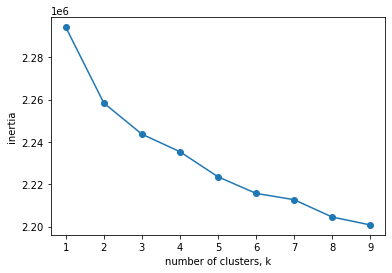

In [ ]:
import matplotlib.pyplot as plt
ks = range(1, 10)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(cv_matrix)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [ ]:
NUM_CLUSTERS = 8
km = KMeans(n_clusters=NUM_CLUSTERS, max_iter=1000, n_init=50, random_state=42).fit(cv_matrix)
print(km.labels_)

[1 5 5 ... 5 5 5]


## Cluster Based on Numeric Data

In [ ]:
dfReview  = movie[['title','year','duration','avg_vote']]
dfReview.set_index('title', drop = True, inplace = True)
#dfMovie2 = pd.concat([dfMovie2, dfReview], axis = 1)
dfReview.head()

,year,duration,avg_vote
title,,,
Miss Jerry,1894,45,5.9
The Story of the Kelly Gang,1906,70,6.1
Den sorte drøm,1911,53,5.8
Cleopatra,1912,100,5.2
L'Inferno,1911,68,7.0


In [ ]:
dfReview.loc['Bad Education', 'year'] = '2019'
dfReview['year'] = dfReview['year'].astype('int')
#dfReview.loc['Bad Education']['year']

/Applications/anaconda3/envs/Python38env/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
<ipython-input-18-18e3bc54d287>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfReview['year'] = dfReview['year'].astype('int')


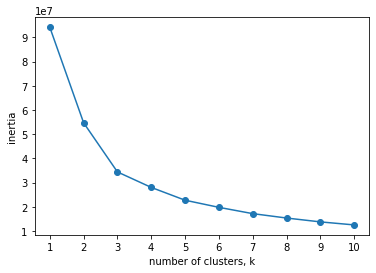

In [ ]:
import matplotlib.pyplot as plt
ks = range(1, 11)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(dfReview)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [ ]:
NUM_CLUSTERS = 3
kmNumeric = KMeans(n_clusters=NUM_CLUSTERS, max_iter=1000, n_init=50, random_state=42).fit(dfReview)
print(kmNumeric.labels_)

[0 0 0 ... 2 1 1]


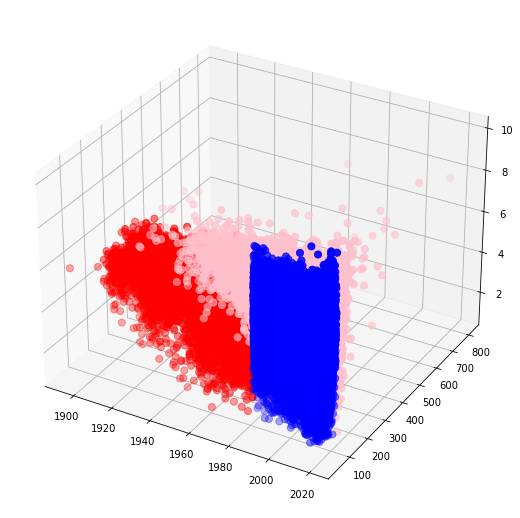

In [ ]:
# Import pyplot
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assign the columns of new_points: xs and ys
x = dfReview.values
y_kmeans = kmNumeric.fit_predict(x)
fig = plt.figure(figsize=(15,7))
ax = Axes3D(fig)

#Visualising the clusters
ax.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], x[y_kmeans == 0, 2], s = 50, 
            c = 'red', label = 'group1')
ax.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], x[y_kmeans == 1, 2],s = 50, 
            c = 'blue', label = 'group2')
ax.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], x[y_kmeans == 2, 2],s = 50, 
            c = 'pink', label = 'group3')


## Combine Two Clusters and Label Movies

In [ ]:
km_labels = pd.DataFrame(km.labels_, columns = ['description'])
kmNumeric_labels = pd.DataFrame(kmNumeric.labels_, columns = ['numeric'])
kClusterDf = pd.concat([movie['title'],km_labels,kmNumeric_labels], axis = 1)
kClusterDf.set_index('title', drop = True, inplace = True)
kClusterDf

,description,numeric
title,,
Miss Jerry,1,0
The Story of the Kelly Gang,5,0
Den sorte drøm,5,0
Cleopatra,2,0
L'Inferno,1,0
...,...,...
Le lion,7,1
De Beentjes van Sint-Hildegard,6,1
Padmavyuhathile Abhimanyu,5,2


In [ ]:
def label_race (row):
    if row['numeric'] == 0:
        if row['description'] == 0:
            return 0
        elif row['description'] == 1:
            return 1
        elif row['description'] == 2:  
            return 2
        elif row['description'] == 3: 
            return 3
        elif row['description'] == 4:  
            return 4
        elif row['description'] == 5:  
            return 5
        elif row['description'] == 6:  
            return 6
        elif row['description'] == 7:  
            return 7
    if row['numeric'] == 1:
        if row['description'] == 0:
            return 8
        elif row['description'] == 1:
            return 9
        elif row['description'] == 2:  
            return 10
        elif row['description'] == 3: 
            return 11
        elif row['description'] == 4:  
            return 12
        elif row['description'] == 5:  
            return 13
        elif row['description'] == 6:  
            return 14
        elif row['description'] == 7:  
            return 15
    if row['numeric'] == 2:
        if row['description'] == 0:
            return 16
        elif row['description'] == 1:
            return 17
        elif row['description'] == 2:  
            return 18
        elif row['description'] == 3: 
            return 19
        elif row['description'] == 4:  
            return 20
        elif row['description'] == 5:  
            return 21
        elif row['description'] == 6:  
            return 22
        elif row['description'] == 7:  
            return 23

In [ ]:
cluster = kClusterDf.apply (lambda row: label_race(row), axis=1)

In [ ]:
kClusterDf = pd.concat([kClusterDf, pd.DataFrame(cluster, columns = ['group'])], axis = 1)
kClusterDf

,description,numeric,group
title,,,
Miss Jerry,1,0,1
The Story of the Kelly Gang,5,0,5
Den sorte drøm,5,0,5
Cleopatra,2,0,2
L'Inferno,1,0,1
...,...,...,...
Le lion,7,1,15
De Beentjes van Sint-Hildegard,6,1,14
Padmavyuhathile Abhimanyu,5,2,21


In [ ]:
bagOfWords = pd.DataFrame(dfMovie['bag_of_words'])
labels = pd.DataFrame(km.labels_)
labels['title'] = movie['title']
labels.set_index('title', inplace = True)
df_new = pd.concat([bagOfWords, pd.DataFrame(cluster, columns = ['group'])], axis = 1)
df_new.columns = ['bag_of_words', 'group']
df_new.head()

,bag_of_words,group
title,,
Miss Jerry,miss jerry romance usa none alexanderblack bla...,1
The Story of the Kelly Gang,the story of the kelly gang biography crime ...,5
Den sorte drøm,den sorte drøm drama denmark germany nan urba...,5
Cleopatra,cleopatra drama history usa english charlesl....,2
L'Inferno,l'inferno adventure drama fantasy italy ital...,1


## Calculate Similarity

In [ ]:
resList = dict()
for i in range(24):
# instantiating and generating the count matrix
    count = CountVectorizer()
    count_matrix = count.fit_transform(df_new[df_new['group'] == i]['bag_of_words'])

# creating a Series for the movie titles so they are associated to an ordered numerical
# list I will use later to match the indexes
    indices = pd.Series(df_new[df_new['group'] == i].index)

    cosine_sim = cosine_similarity(count_matrix, count_matrix)
    resList[i] = cosine_sim

print(resList)

{0: array([[1.        , 0.12456822, 0.14294834, ..., 0.08753762, 0.05800148,
        0.10721125],
       [0.12456822, 1.        , 0.12909944, ..., 0.15811388, 0.06984303,
        0.12909944],
       [0.14294834, 0.12909944, 1.        , ..., 0.13608276, 0.06011131,
        0.14814815],
       ...,
       [0.08753762, 0.15811388, 0.13608276, ..., 1.        , 0.07362102,
        0.09072184],
       [0.05800148, 0.06984303, 0.06011131, ..., 0.07362102, 1.        ,
        0.06011131],
       [0.10721125, 0.12909944, 0.14814815, ..., 0.09072184, 0.06011131,
        1.        ]]), 1: array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.05063697],
       [0.        , 1.        , 0.        , ..., 0.04029115, 0.06681531,
        0.03450328],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.04029115, 0.        , ..., 1.        , 0.26382243,
        0.23354968],
       [0.        , 0.06681

In [ ]:
# creating a Series for the movie titles so they are associated to an ordered numerical
# list I will use in the function to match the indexes
indices = pd.Series(df_new.index)

#  defining the function that takes in movie title 
# as input and returns the top 10 recommended movies
# def recommendations(title, cosine_sim = cosine_sim):
def recommendations(title, n):
    
    # initializing the empty list of recommended movies
    recommended_movies = []

    # get the curCluster
    clusterNo = df_new.loc[title]['group']
    df_curCluster = df_new[df_new['group'] == clusterNo]
    indices = pd.Series(df_curCluster.index)
    
    cosine_sim = resList[clusterNo]
    
    # gettin the index of the movie that matches the title
    idx = indices[indices == title].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar movies
    top_10_indexes = list(score_series.iloc[1:11].index)
    
    # populating the list with the titles of the best 10 matching movies
    for i in top_10_indexes:
        recommended_movies.append(list(df_curCluster.index)[i])
        
    return recommended_movies

## Recommendation List - Examples

In [ ]:
recommendations('Miss Jerry', resList[df_new.loc['Miss Jerry']['group']])

['Pigen og pressefotografen',
 'Devushka bez adresa',
 'Vase de noces',
 'Devchata',
 'Il navigatore',
 'Dvadtsat shest dney iz zhizni Dostoevskogo',
 'Een pige og 39 sømænd',
 'Il segno di Zorro',
 'Det var paa Rundetaarn',
 'Rantevou ston aera']

In [ ]:
recommendations('The Story of the Kelly Gang', resList[df_new.loc['The Story of the Kelly Gang']['group']])

['The law of the border',
 'La Raulito',
 'Lo sciacallo di Nahueltoro',
 'Hoodwink',
 'Down to the Sea in Ships',
 'Útlaginn',
 'The Lady with a Lamp',
 'La Mazza',
 'El húsar de la muerte',
 'Mira']

In [ ]:
recommendations('Den sorte drøm', resList[df_new.loc['Den sorte drøm']['group']])

['Den forsvundne fuldmægtig',
 'Café Paradis',
 'Uomini di domenica',
 'Fløjtespilleren',
 'Satana likuyushchiy',
 'Gøngehøvdingen',
 'Sunrise',
 'Carmina burana',
 'Una locanda di Tokyo',
 'Der var engang']

In [ ]:
#df_new.loc['Cleopatra']['group']

In [ ]:
#recommendations('Cleopatra', resList[17])

In [ ]:
recommendations("L'Inferno", resList[df_new.loc["L'Inferno"]['group']])

['Uccellacci e uccellini',
 "L'esorciccio",
 'Il commissario',
 'Gli onorevoli',
 'Il presidente del Borgorosso Football Club',
 'Il... Belpaese',
 'Detenuto in attesa di giudizio',
 "L'insegnante va in collegio",
 'Il gaucho',
 'Le bambole']

## Improvements
Recommendations based on three films. The max n will be 500(set manually).

In [ ]:
# creating a Series for the movie titles so they are associated to an ordered numerical
# list I will use in the function to match the indexes
indices = pd.Series(df_new.index)

#  defining the function that takes in movie title 
# as input and returns the top recommended movies
def recommendations2(title1, title2, title3, n):
    
    # initializing the empty list of recommended movies
    recommended_movies = []
    
    # get the curCluster
    clusterNo1 = df_new.loc[title1]['group']
    df_curCluster1 = df_new[df_new['group'] == clusterNo1]
    indices1 = pd.Series(df_curCluster1.index)
    
    clusterNo2 = df_new.loc[title2]['group']
    df_curCluster2 = df_new[df_new['group'] == clusterNo2]
    indices2 = pd.Series(df_curCluster2.index)
    
    clusterNo3 = df_new.loc[title3]['group']
    df_curCluster3 = df_new[df_new['group'] == clusterNo3]
    indices3 = pd.Series(df_curCluster3.index)
    
    df_curCluster = pd.concat([df_curCluster1, df_curCluster2, df_curCluster3], axis = 0)
    
    # gettin the index of the movie that matches the title
    idx1 = indices1[indices1 == title1].index[0]
    idx2 = indices2[indices2 == title2].index[0]
    idx3 = indices3[indices3 == title3].index[0]
    
    # creating a Series with the similarity scores in descending order
    cosine_sim1 = resList[clusterNo1]
    score_series1 = pd.Series(cosine_sim1[idx1]).sort_values(ascending = False)
    
    cosine_sim2 = resList[clusterNo2]
    score_series2 = pd.Series(cosine_sim2[idx2]).sort_values(ascending = False)

    cosine_sim3 = resList[clusterNo3]
    score_series3 = pd.Series(cosine_sim2[idx3]).sort_values(ascending = False)
    
    score_series = pd.concat([score_series1, score_series2, score_series3], axis = 0)
    score_series = score_series.reset_index(drop = True)
    # getting the indexes of the 10 most similar movies
    if n > 500:
        n = 500
    top_10_indexes = list(score_series.iloc[1:n].index)
    
    # populating the list with the titles of the best 10 matching movies
    for i in top_10_indexes:
        recommended_movies.append(list(df_curCluster.index)[i])
        
    return recommended_movies

In [ ]:
# test example
recommendations2("L'Inferno",'Den sorte drøm','Miss Jerry', 20)

["L'Inferno",
 'Independenta Romaniei',
 'Maciste',
 'Furcht',
 "A Girl's Folly",
 'Thomas Graals bästa film',
 'Tillie Wakes Up',
 'Indemoniato',
 'Il ritorno al paradiso terrestre',
 "Don't Change Your Husband",
 'La bambola di carne',
 "Il lago d'oro, ovvero I ragni",
 'Un affare misterioso',
 'Wagon Tracks',
 'Erotikon',
 'Il Golem - Come venne al mondo',
 'Il segno di Zorro',
 'Die Spinnen, 2. Teil - Das Brillantenschiff',
 'Das wandernde Bild']